# Testing Model




In [4]:
!pip install torchsummary


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached torchsummary-1.5.1-py3-none-any.whl (2.8 kB)


# Run with scheduler

input shape: (1,{input_freq},{input_time})
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1              [-1, 1, 1376]           1,516
               GRU-2  [[-1, 1, 1375], [-1, 2, 1375]]               0
            Linear-3              [-1, 1, 1375]       1,892,000
           Sigmoid-4                 [-1, 1375]               0
Total params: 1,893,516
Trainable params: 1,893,516
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 2.13
Forward/backward pass size (MB): 28.82
Params size (MB): 7.22
Estimated Total Size (MB): 38.17
----------------------------------------------------------------


C:\Users\AT030915\AIG\venv\AIG_venv\lib\site-packages\torch\optim\lr_scheduler.py:1699: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


Epoch [1] loss: 0.4467166066169739, learning rate [0.0004], training accuracy cutoff (0.1): 0.054337662337662344
Epoch [2] loss: 0.5479348301887512, learning rate [0.0006341463414634147], training accuracy cutoff (0.1): 0.6788571428571428
Epoch [3] loss: 0.4487757384777069, learning rate [0.0008682926829268293], training accuracy cutoff (0.1): 0.9042077922077921
Epoch [4] loss: 0.3522975444793701, learning rate [0.001102439024390244], training accuracy cutoff (0.1): 0.7865974025974027
Epoch [5] loss: 0.3416157364845276, learning rate [0.0013365853658536587], training accuracy cutoff (0.1): 0.6381818181818184
Epoch [6] loss: 0.388721227645874, learning rate [0.0015707317073170733], training accuracy cutoff (0.1): 0.7917922077922077
Epoch [7] loss: 0.4037974178791046, learning rate [0.0018048780487804879], training accuracy cutoff (0.1): 0.7947532467532467
Epoch [8] loss: 0.38528427481651306, learning rate [0.0020390243902439027], training accuracy cutoff (0.1): 0.7443636363636362
Epoch 

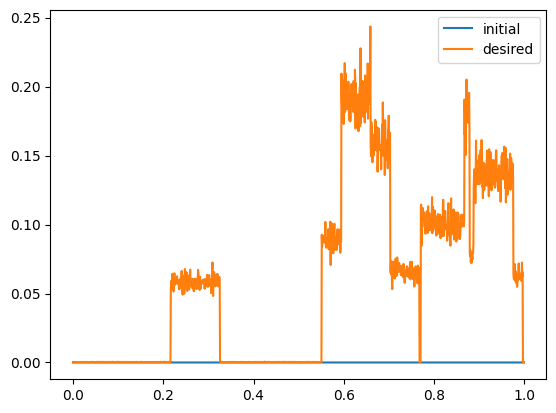

1.0


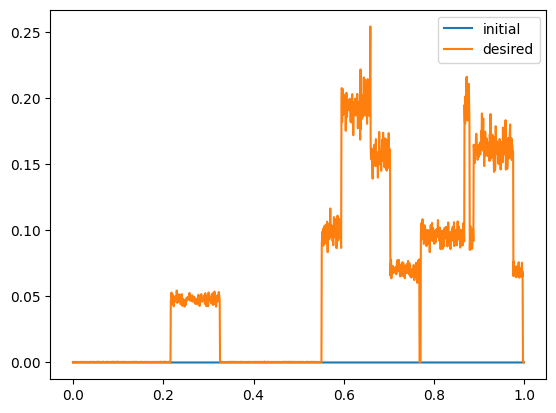

1.0


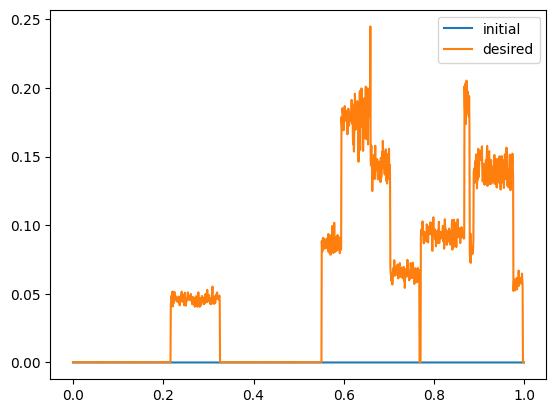

0.8909090909090909


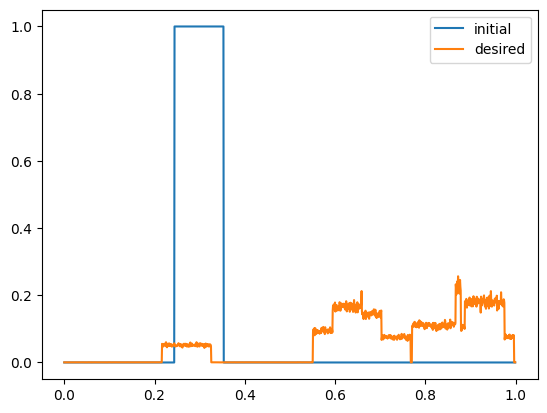

0.8909090909090909


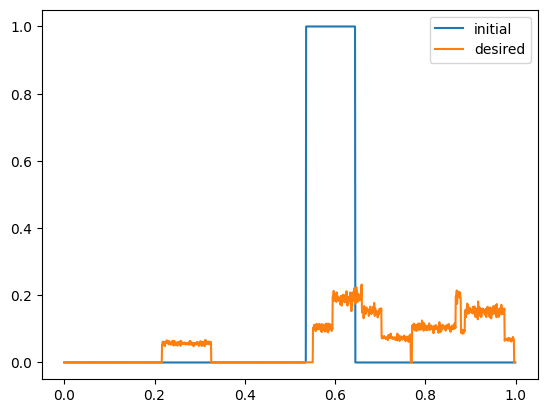

0.8909090909090909


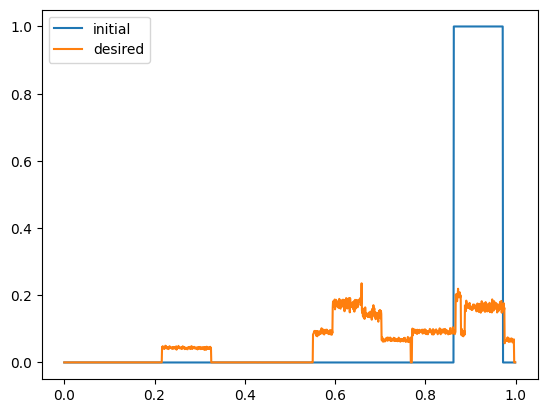

In [6]:
%run train.py

# Run without scheduler to adjust the learnign rate


input shape: (1,{input_freq},{input_time})
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1              [-1, 1, 1376]           1,516
               GRU-2  [[-1, 1, 1375], [-1, 2, 1375]]               0
            Linear-3              [-1, 1, 1375]       1,892,000
           Sigmoid-4                 [-1, 1375]               0
Total params: 1,893,516
Trainable params: 1,893,516
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 2.13
Forward/backward pass size (MB): 28.82
Params size (MB): 7.22
Estimated Total Size (MB): 38.17
----------------------------------------------------------------
[1,     4] loss: 0.0013324
[1,     8] loss: 0.0007146
[1,    12] loss: 0.0008007
[2,     4] loss: 0.0001261
[2,     8] loss: 0.0002217
[2,    12] loss: 0.0007053
[3,     4] loss: 0.0001694
[3,     8] loss: 0.0002505
[3,    12] loss: 0.0006224
[

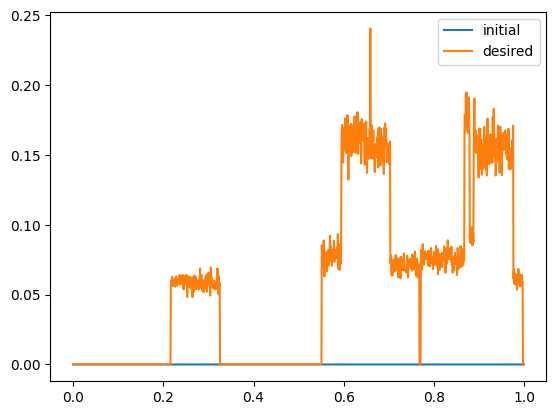

1.0


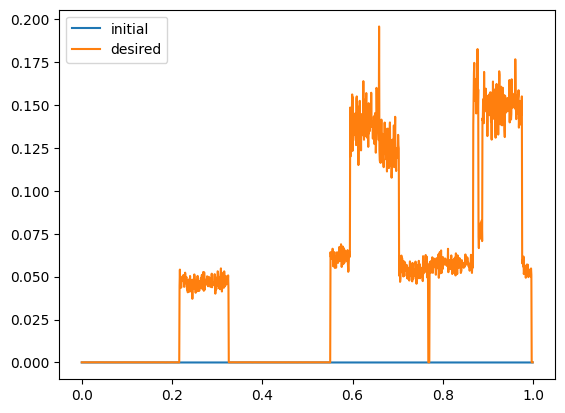

1.0


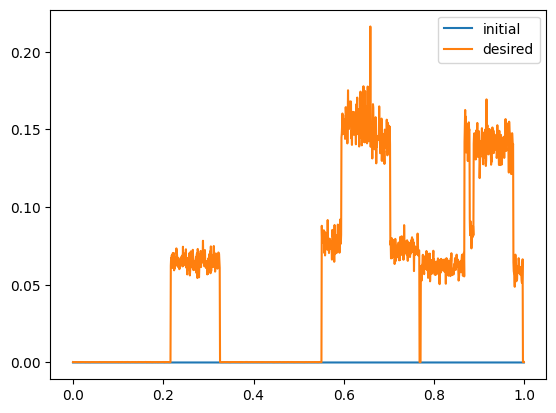

0.8909090909090909


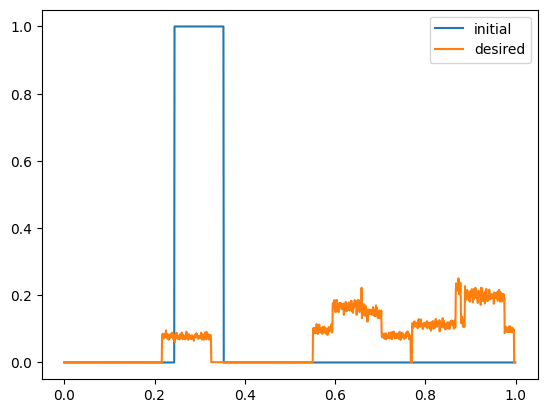

0.8909090909090909


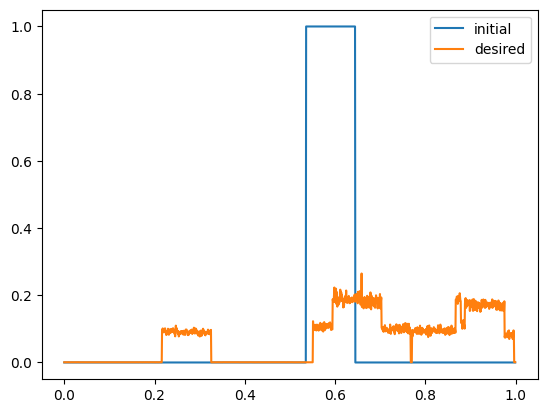

0.8909090909090909


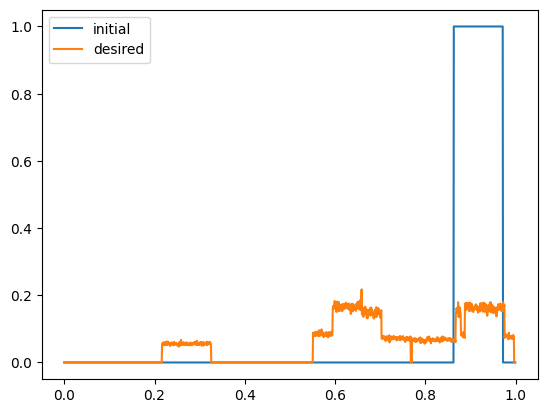

In [3]:
'''
Audio sampled at 16k hertz
10 sec clip
reduced to 101 x 5511   (freq x time) spectrogram
whcih then gets compressed by the CNN/GRU to a 1 x 1375 logit tensor
'''

%run train.py

1.0


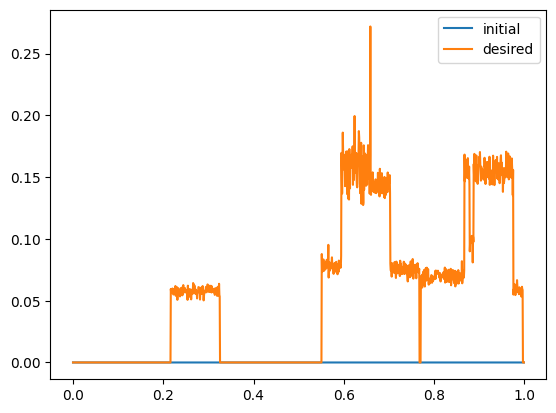

1.0


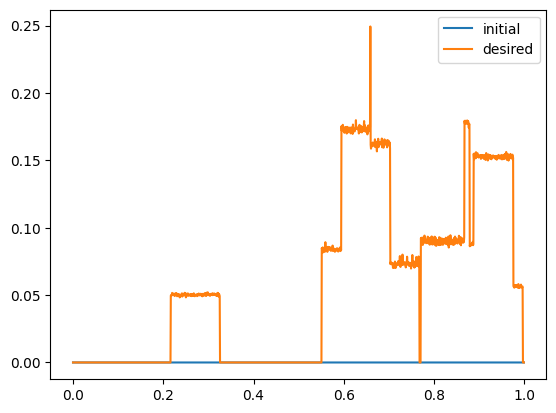

1.0


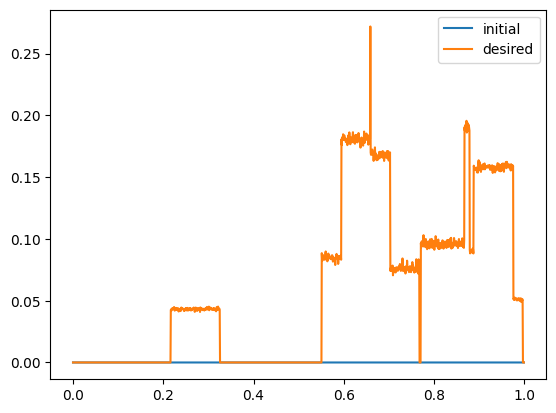

0.8909090909090909


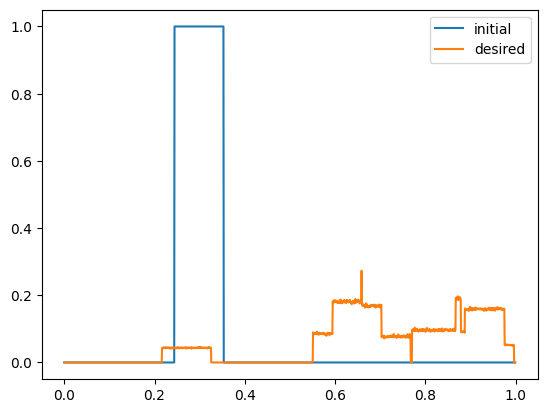

0.8909090909090909


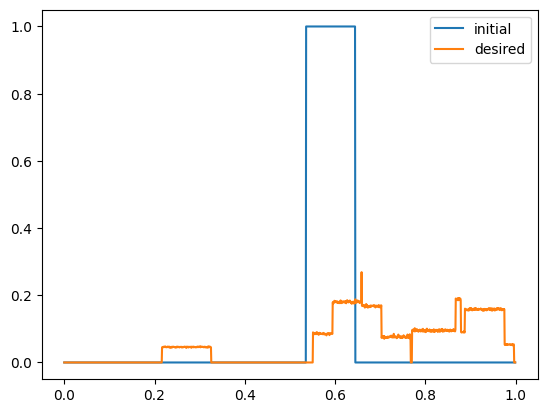

0.8909090909090909


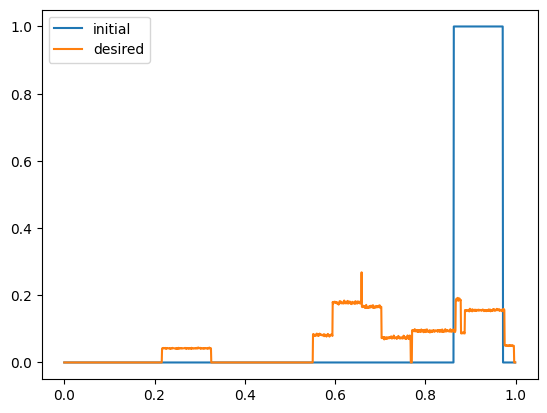

In [31]:
# test on test data
testloader = test
for i, data in enumerate(testloader, 0):
    # get the inputs; data is a list of [inputs, labels]
    inputs, labels_og = data

    labels =  resize_label(labels_og, label_time)
    
    out = model(inputs)
    
    print(get_accuracy(labels, out,cutoff=0.8))
    
    #plot 
    plot_new_vs_old_label(labels,out.detach().numpy())

In [18]:
w, sr = torchaudio.load('speech_commands_v0.02.tar/backward/0165e0e8_nohash_0.wav')
w.shape

torch.Size([1, 16000])

In [29]:
# generate data set
from generate_training_data import * 

background_filepath =  'speech_commands_v0.02.tar/_background_noise_/doing_the_dishes.wav'
sample_time = 10
resample_rate = 16000 # as in don't use any resampling 
number_samples = 10
folder_trigger_word = 'speech_commands_v0.02.tar/nine/'
folder_negative_word = 'speech_commands_v0.02.tar/backward/'
outpath_location = 'data'

val = Create_Test_Train_Data(background_filepath, sample_time,resample_rate,number_samples, folder_trigger_word,folder_negative_word,outpath_location)

val.generate_all()

inserted clip into 139655 position - 8.7284375 seconds out of 10 seconds
data/train/data_positive_0.wav
data/train/label_positive_0.pt
inserted clip into 124241 position - 7.7650625 seconds out of 10 seconds
data/train/data_positive_1.wav
data/train/label_positive_1.pt
inserted clip into 89203 position - 5.5751875 seconds out of 10 seconds
data/train/data_positive_2.wav
data/train/label_positive_2.pt
inserted clip into 96167 position - 6.0104375 seconds out of 10 seconds
data/train/data_positive_3.wav
data/train/label_positive_3.pt
inserted clip into 106391 position - 6.6494375 seconds out of 10 seconds
data/train/data_positive_4.wav
data/train/label_positive_4.pt
inserted clip into 142953 position - 8.9345625 seconds out of 10 seconds
data/train/data_positive_5.wav
data/train/label_positive_5.pt
inserted clip into 35883 position - 2.2426875 seconds out of 10 seconds
data/train/data_positive_6.wav
data/train/label_positive_6.pt
inserted clip into 40261 position - 2.5163125 seconds out 

(tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0222, -0.0148, -0.0051]]),
 tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0222, -0.0148, -0.0051]]))

In [3]:
from data_loading import *
from torch.utils.data import DataLoader

test_waveform = ReadData('test',spectrogram_str='False')
test = ReadData('test',spectrogram_str='True',number_frequencies = 101,number_time_steps = 1375)
train = ReadData('train',spectrogram_str='True',number_frequencies = 101,number_time_steps = 1375)

batch_size = 4
train_loader = DataLoader(train, batch_size, shuffle=False)
test_loader = DataLoader(test, batch_size, shuffle=False)


In [4]:
#checking labels are correct
for I in range(len(train)):
    print(torch.max(train[I][1]))

tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)


In [2]:
print(test_waveform[0][0][0].shape,type(test_waveform[0][0][1]),test_waveform[0][1].shape)
print(test[0][0].shape,test[0][1].shape)

torch.Size([1, 50000]) <class 'int'> torch.Size([1, 50000])
torch.Size([1, 101, 1389]) torch.Size([1, 50000])


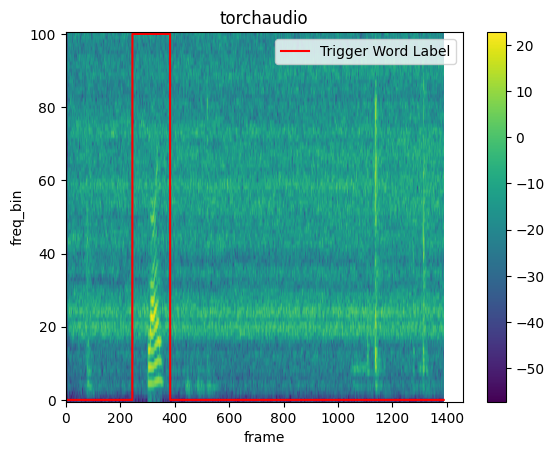

In [12]:
#example plot
spec_wave = test[-1][0]
spec_label = test[-1][1]

plot_spectrogram(spec_wave[0], spec_label, title='torchaudio')

In [15]:
#check clip plays
from IPython.display import Audio
#play clip

waveform, rsr  = test_waveform[-1][0]  # note using the waveform version of the data loader
Audio(waveform.numpy()[0], rate=rsr)


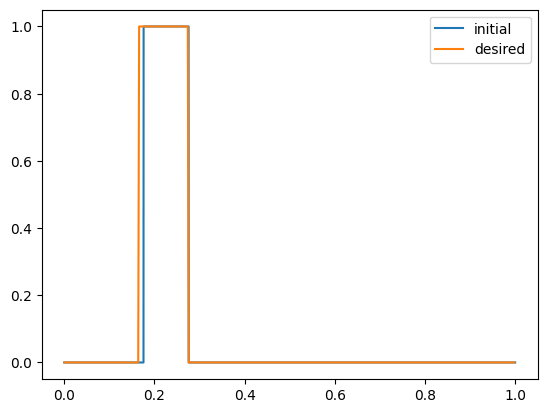

In [14]:
#testing resizing of new and old labels

spec_label_new =  resize_label(spec_label, 500)

plot_new_vs_old_label(spec_label,spec_label_new)
   

In [16]:
# import the model and initialise 
from model import *
input_freq =spec_wave.shape[1]
input_time = spec_wave.shape[2]
output_time = spec_label_new.shape[1]
hidden_time = output_time #could change this down the line 


model = TriggerWord_LSTM(input_freq, input_time , hidden_time, output_time, Conv_p(),GRU_p())

from torchsummary import summary
#model.Conv
summary(model, (101,1389))    


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1               [-1, 1, 344]           1,516
               GRU-2  [[-1, 1, 500], [-1, 2, 500]]               0
            Linear-3               [-1, 1, 500]         250,500
           Sigmoid-4                  [-1, 500]               0
Total params: 252,016
Trainable params: 252,016
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.54
Forward/backward pass size (MB): 3.80
Params size (MB): 0.96
Estimated Total Size (MB): 5.30
----------------------------------------------------------------


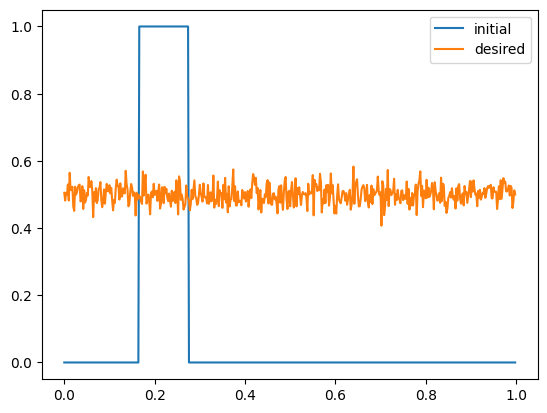

In [17]:
# Plot an initial comparison - before training
outf= model(spec_wave)

plot_new_vs_old_label(spec_label_new,outf.detach().numpy())

In [24]:
# pick optimiser + loss function
import torch.optim as optim

criterion = torch.nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)




In [25]:


trainloader = train
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels_og = data
        
        labels =  resize_label(labels_og, 500)
        

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 4 == 3:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.7f}')
            running_loss = 0.0

print('Finished Training')


[1,     4] loss: 0.0000332
[1,     8] loss: 0.0008594
[1,    12] loss: 0.0017727
[2,     4] loss: 0.0016930
[2,     8] loss: 0.0003093
[2,    12] loss: 0.0008769
[3,     4] loss: 0.0003320
[3,     8] loss: 0.0002294
[3,    12] loss: 0.0006008
[4,     4] loss: 0.0000405
[4,     8] loss: 0.0001623
[4,    12] loss: 0.0005569
[5,     4] loss: 0.0000511
[5,     8] loss: 0.0001373
[5,    12] loss: 0.0005448
[6,     4] loss: 0.0000275
[6,     8] loss: 0.0000863
[6,    12] loss: 0.0004941
[7,     4] loss: 0.0000318
[7,     8] loss: 0.0000907
[7,    12] loss: 0.0005131
[8,     4] loss: 0.0000386
[8,     8] loss: 0.0000318
[8,    12] loss: 0.0004642
[9,     4] loss: 0.0000479
[9,     8] loss: 0.0000210
[9,    12] loss: 0.0006111
[10,     4] loss: 0.0000523
[10,     8] loss: 0.0000762
[10,    12] loss: 0.0004163
Finished Training


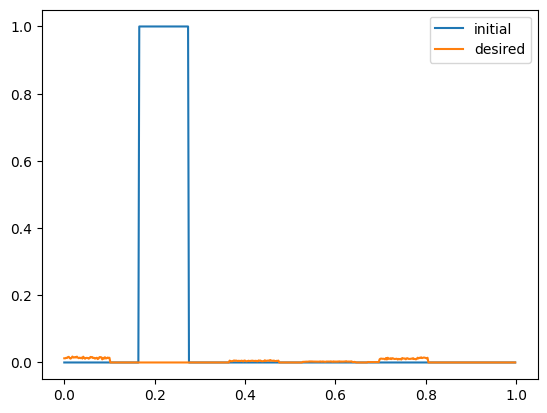

In [26]:
# rerun test

outf= model(spec_wave)

plot_new_vs_old_label(spec_label_new,outf.detach().numpy())

In [27]:

outf_new = model(spec_wave)
def get_accuracy(y_true, y_prob,cutoff=0.8):
    y_true = y_true.squeeze()
    y_prob = y_prob.squeeze()
    
    
    assert y_true.ndim == 1 and y_true.size() == y_prob.size()
    y_prob = y_prob > cutoff
    return (y_true == y_prob).sum().item() / y_true.size(0)


get_accuracy(spec_label_new, outf_new,cutoff=0.8)

0.89

1.0


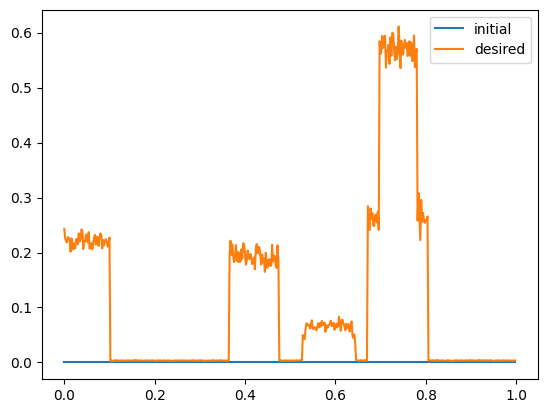

1.0


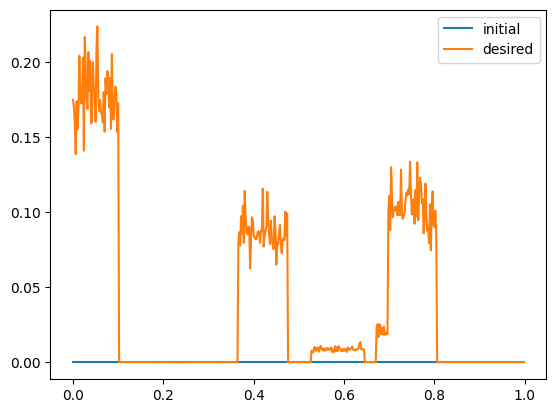

1.0


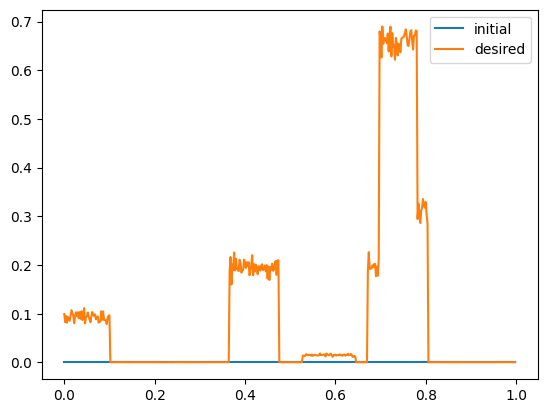

0.89


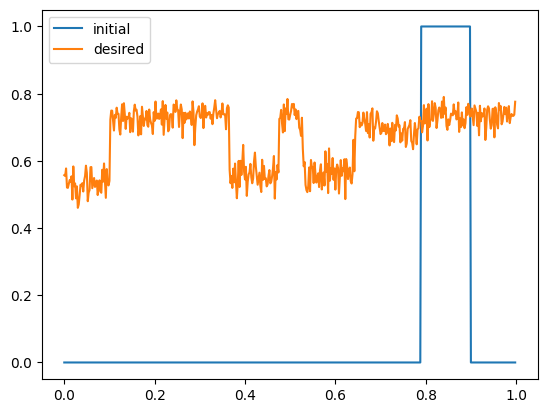

0.89


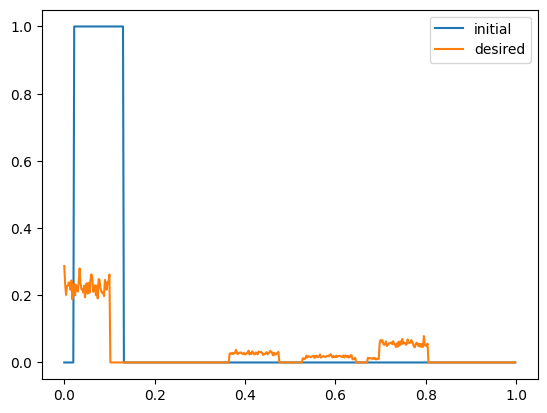

0.89


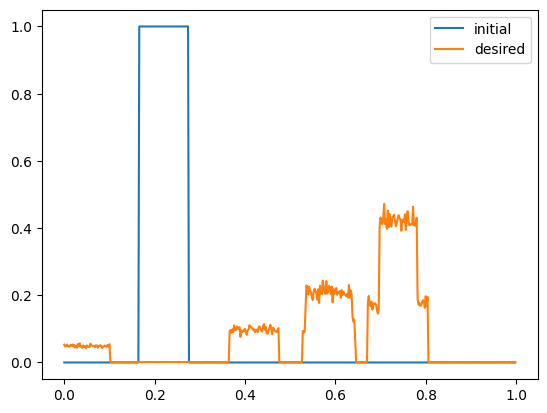

In [28]:
# test on test data
testloader = test
for i, data in enumerate(testloader, 0):
    # get the inputs; data is a list of [inputs, labels]
    inputs, labels_og = data

    labels =  resize_label(labels_og, 500)
    
    out = model(inputs)
    
    print(get_accuracy(labels, out,cutoff=0.8))
    
    #plot 
    plot_new_vs_old_label(labels,out.detach().numpy())
    

# Old code


# Now testing out CNN

In [181]:
print(spec_wave.shape, spec_label_new.shape)

#  [batch, frequency, time] - we want to apply CNN to frequency to reduce it 

input_freq =spec_wave.shape[1]
input_time = spec_wave.shape[2]
output_time = spec_label_new.shape[1]



torch.Size([1, 101, 1389]) torch.Size([1, 500])


In [ ]:
from torch.nn import Conv1d
in_channels =input_freq
kernel_size = 15
stride = 4
out_channels = 1

C = Conv1d(in_channels = in_channels, out_channels = out_channels, kernel_size = kernel_size, stride=stride)


In [ ]:
out1 = C(spec_wave)
out1.shape

torch.Size([1, 1, 344])

In [ ]:
from torch.nn import GRU

input_size = out1.shape[2]
hidden_size = output_time  # size of the final dimension 
num_layers =2
batch_first = True

dropout = 0.8

G = GRU(input_size =input_size, hidden_size =hidden_size,num_layers = num_layers, batch_first =batch_first, dropout =dropout)




In [ ]:
out2, hn = G(out1)

print(out2.shape, hn.shape)


torch.Size([1, 1, 500]) torch.Size([2, 1, 500])


In [ ]:
# need a dense layer
from torch.nn import Linear
in_features = out2.shape[2]
out_features = output_time

D = Linear(in_features = in_features , out_features = out_features)


In [ ]:
out3 = D(out2).squeeze(1)  # squeeze the redundant dimension - keeping the batch dimension
out3.shape

torch.Size([1, 500])

In [ ]:
# final sigmoid layer
from torch.nn import Sigmoid 

S = Sigmoid()


In [ ]:
outf = S(out3)

outf.shape

torch.Size([1, 500])

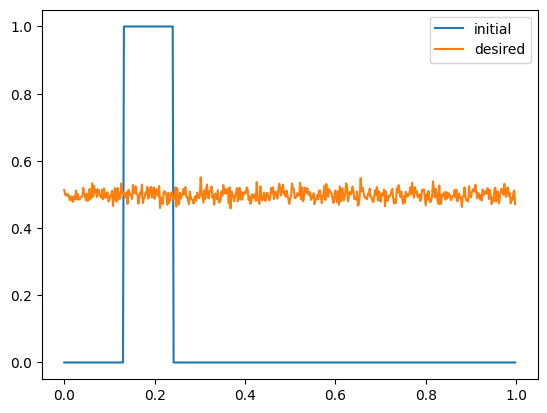

In [196]:
#plot comparison of new and old labelling 

plot_new_vs_old_label(spec_label_new,outf.detach().numpy())

In [212]:
#https://discuss.pytorch.org/t/calculate-accuracy-in-binary-classification/91758
def get_accuracy(y_true, y_prob,cutoff=0.8):
    y_true = y_true.squeeze()
    y_prob = y_prob.squeeze()
    
    
    assert y_true.ndim == 1 and y_true.size() == y_prob.size()
    y_prob = y_prob > cutoff
    return (y_true == y_prob).sum().item() / y_true.size(0)


get_accuracy(spec_label_new, outf,cutoff=0.8)




0.89

In [ ]:
# create neural network + summarise it 
# then start training it 

In [309]:
import torch.nn as nn
from torchsummary import summary

input_freq =spec_wave.shape[1]
input_time = spec_wave.shape[2]
hidden_time = output_time #could change this down the line 
output_time = spec_label_new.shape[1]


#class to store Conv parameters - generally these won't be changed - but I'm leaving the option open here
# I'd only really want to change out_channels
class Conv_p:
    def __init__(self,kernel_size =15,stride=4, out_channels = 1):
        self.kernel_size = kernel_size
        self.stride = stride
        self.out_channels = 1

        
class GRU_p:
    def __init__(self, num_layers =2, batch_first = True, dropout = 0.8):
        if num_layers == 1:
            dropout = 0 # can't have a non zero dropout in the final layer
        
        self.num_layers = num_layers
        self.batch_first = batch_first
        self.dropout = dropout
        
        

        
        



class TriggerWord_LSTM(nn.Module):
    '''
    LSTM neural network for performing trigger word detection - based on paper Trigger_Word_Recognition_using_LSTM
    '''
    
    def __init__(self, input_freq, input_time , hidden_time, output_time, Conv_p, GRU_p):
        super().__init__()
        '''
        Create layers of the neural network - note freq/time denote the sizes of the 1st and 2nd dimensions respectively
        '''
        #save parameters here
        self.input_freq = input_freq
        self.input_time = input_time
        self.hidden_time = hidden_time
        self.output_time = output_time
        self.Conv_p = Conv_p
        self.GRU_p = GRU_p
        
        
        #CONV1D
        self.Conv = nn.Conv1d(in_channels = input_freq, 
                              out_channels = Conv_p.out_channels,
                              kernel_size = Conv_p.kernel_size, 
                              stride=Conv_p.stride)

        
        #GRU
        # calculate size of final dimension from conv1d - equation from documentation
        #https://pytorch.org/docs/stable/generated/torch.nn.Conv1d.html
        Conv_outsize = int(((input_time + 2 * self.Conv.padding[0] - self.Conv.dilation[0] * (self.Conv.kernel_size[0] -1) -1 )/self.Conv.stride[0]) + 1 )
        
        self.GRU = nn.GRU(input_size =Conv_outsize, 
        hidden_size =hidden_time,
        num_layers  = GRU_p.num_layers, 
        batch_first = GRU_p.batch_first, 
        dropout     = GRU_p.dropout)
                
        # DENSE
        self.Dense = nn.Linear(in_features = hidden_time , out_features = output_time)

        # Sigmoid layer
        self.Sigmoid = Sigmoid()

        
    def forward(self,xb):
        '''
        Apply the layers to the batch input
        '''
        out = self.Conv(xb)
              
        out, hidden_state = self.GRU(out)

        out = self.Dense(out).squeeze(1) 

        out = self.Sigmoid(out)
               
        return out
        
        
    def training_step(self, batch):
        
        
        

model = TriggerWord_LSTM(input_freq, input_time , hidden_time, output_time, Conv_p(),GRU_p())

#model.Conv
summary(model, (101,1389))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1               [-1, 1, 344]           1,516
               GRU-2  [[-1, 1, 500], [-1, 2, 500]]               0
            Linear-3               [-1, 1, 500]         250,500
           Sigmoid-4                  [-1, 500]               0
Total params: 252,016
Trainable params: 252,016
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.54
Forward/backward pass size (MB): 3.80
Params size (MB): 0.96
Estimated Total Size (MB): 5.30
----------------------------------------------------------------


In [313]:
import torch.optim as optim

criterion = torch.nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)



In [314]:
train

In [316]:

trainloader = train
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels_og = data
        
        labels =  resize_label(spec_label, 500)
        

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

reduced from 50000 to 500
reduced from 50000 to 500
reduced from 50000 to 500
reduced from 50000 to 500
[1,     4] loss: 0.000
reduced from 50000 to 500
reduced from 50000 to 500
reduced from 50000 to 500
reduced from 50000 to 500
[1,     8] loss: 0.000
reduced from 50000 to 500
reduced from 50000 to 500
reduced from 50000 to 500
reduced from 50000 to 500
[1,    12] loss: 0.000
reduced from 50000 to 500
reduced from 50000 to 500
reduced from 50000 to 500
reduced from 50000 to 500
reduced from 50000 to 500
reduced from 50000 to 500
[2,     4] loss: 0.000
reduced from 50000 to 500
reduced from 50000 to 500
reduced from 50000 to 500
reduced from 50000 to 500
[2,     8] loss: 0.000
reduced from 50000 to 500
reduced from 50000 to 500
reduced from 50000 to 500
reduced from 50000 to 500
[2,    12] loss: 0.000
reduced from 50000 to 500
reduced from 50000 to 500
Finished Training


In [239]:

summary(model, (1,101,1389))

NotImplementedError: Module [TriggerWord_LSTM] is missing the required "forward" function

# Old code

In [43]:
initial_size  - (I+1)*int_val

390

In [413]:
test_spec = ReadData('test',spectrogram_str='True')


torch.Size([1, 101, 511])

In [392]:
test = ReadData()

[[wave1,sample_rate],label1] = test[0]

[[wave2,sample_rate],label2] = test[1]


spec_wave1 = create_spectrogram(wave1)

    
plot_spectrogram(spec_wave1[0], label1, title='torchaudio')

Audio(waveform.numpy()[0], rate=resample_rate)


spec_wave2 = create_spectrogram(wave2)

    
plot_spectrogram(spec_wave2[0], label2, title='torchaudio')

Audio(waveform.numpy()[0], rate=resample_rate)



spec_waveform.shape : torch.Size([1, 101, 516])
waveform.shape :  torch.Size([1, 50000])


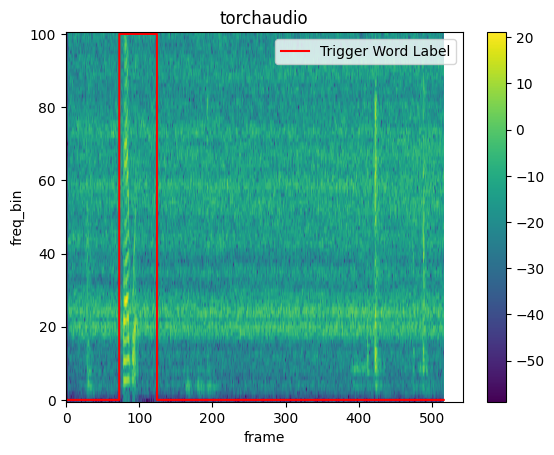

In [394]:
#load data


spec_wave1 = create_spectrogram(wave1)

    
plot_spectrogram(spec_wave1[0], label1, title='torchaudio')

Audio(waveform.numpy()[0], rate=resample_rate)


spec_waveform.shape : torch.Size([1, 101, 516])
waveform.shape :  torch.Size([1, 50000])


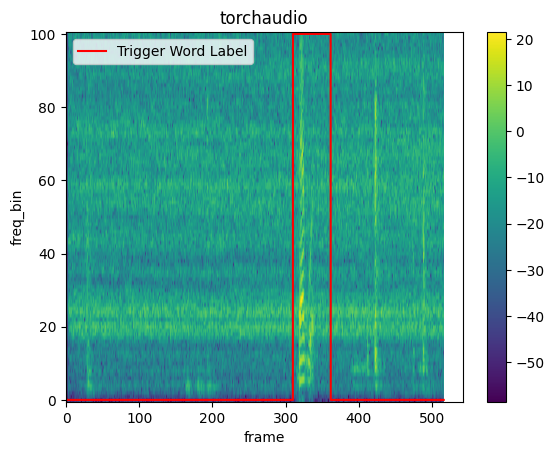

In [395]:
spec_wave2 = create_spectrogram(wave2)

    
plot_spectrogram(spec_wave2[0], label2, title='torchaudio')

Audio(waveform.numpy()[0], rate=resample_rate)


In [354]:
test[5][0][0] == test[4][0][0]

tensor([[True, True, True,  ..., True, True, True]])

In [341]:
x = [torchaudio.load(data[0]),torch.load(label[0])]


5000

In [319]:
sorted(data_positive,reverse=False)

['data/test\\data_positive_7.wav',
 'data/test\\data_positive_8.wav',
 'data/test\\data_positive_9.wav']

# Testing creating training data

https://pytorch.org/audio/stable/tutorials/audio_io_tutorial.html
https://discuss.pytorch.org/t/how-to-create-a-custom-dataset-for-audio-recognition/120762
https://pytorch.org/tutorials/intermediate/speech_command_recognition_with_torchaudio.html

In [1]:
%pwd

'C:\\Users\\AT030915\\AIG'

In [2]:
filepath= 'speech_commands_v0.02.tar/nine/*.wav'

In [3]:
import glob
files = glob.glob(filepath)


In [4]:
files[0]

'speech_commands_v0.02.tar/nine\\00b01445_nohash_0.wav'

In [5]:
#import librosa
import  matplotlib.pyplot as plt 
from torchaudio.utils import download_asset
import torchaudio

import torch

from IPython.display import Audio

In [6]:

waveform, sample_rate = torchaudio.load(files[0])

In [7]:
def plot_waveform(waveform, sample_rate):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].plot(time_axis, waveform[c], linewidth=1)
        axes[c].grid(True)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle("waveform")
    plt.show(block=False)

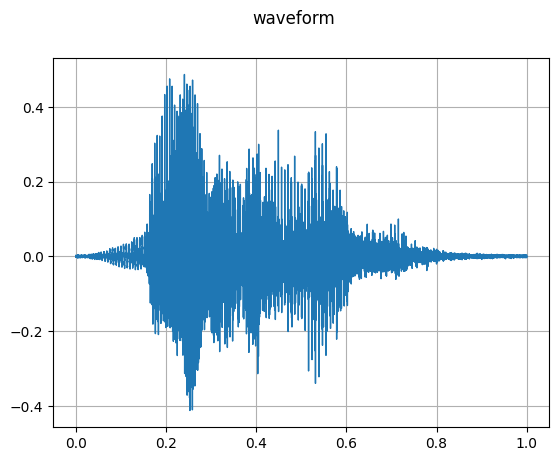

In [8]:
plot_waveform(waveform, sample_rate)

In [9]:
def plot_specgram(waveform, sample_rate, title="Spectrogram"):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].specgram(waveform[c], Fs=sample_rate)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle(title)
    plt.show(block=False)

In [10]:
waveform.shape

torch.Size([1, 16000])

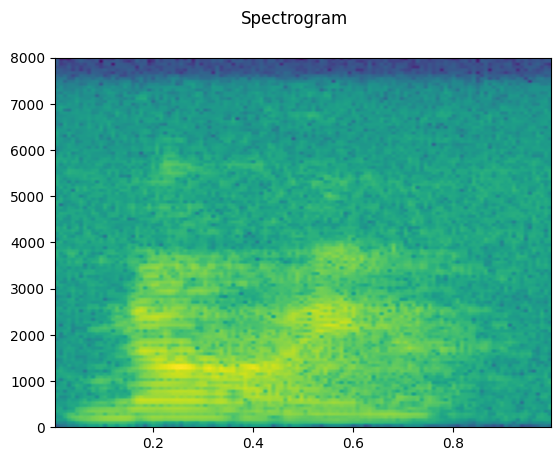

In [11]:
plot_specgram(waveform, sample_rate)

In [12]:
# play audio
Audio(waveform.numpy()[0], rate=sample_rate)

In [13]:
# testing spectrogram
transform = torchaudio.transforms.Spectrogram(n_fft=800)
Spectrogram = transform(waveform)

In [14]:
Spectrogram.shape

torch.Size([1, 401, 41])

# Have a go at creating a training example

In [15]:
# load background 

background_file= 'speech_commands_v0.02.tar/_background_noise_/doing_the_dishes.wav'

b_waveform, b_sample_rate = torchaudio.load(background_file)

Audio(b_waveform.numpy()[0], rate=b_sample_rate)


In [16]:
# extract 10 sec of the background noise 
t =10
units = b_sample_rate * t
b_temps = b_waveform[0,0:units].reshape([1,units])

Audio(b_temps.numpy()[0], rate=b_sample_rate)

In [17]:
# load the trigger word 

import glob
files = glob.glob(filepath)

waveform, sample_rate = torchaudio.load(files[0])


In [18]:
#combine word and backgground - only at the start for now 
import torch.nn.functional as F

waveform_s= waveform.shape[1]

waveform_padded = F.pad(input=waveform, pad = (0,units-waveform_s), mode='constant' , value=0)

Audio(waveform_padded.numpy()[0], rate=sample_rate)

In [21]:
# add word in a rondom place
background_length = b_temps.shape[1]
tw_length = waveform.shape[1]

import random
random.seed(0)

start_rand = 0
end_rand = background_length - tw_length #so that we fit the word in still

start = random.randint(start_rand, end_rand)
end = start + tw_length
print(start)

waveform_padded_random = b_temps

waveform_padded_random[0,start:end]  = waveform + b_temps[0,start:end]



Audio(waveform_padded_random.numpy()[0], rate=sample_rate)




100989


In [26]:
label_random= torch.zeros([1,background_length])

In [30]:
#create label random

#create labels 
label_random= torch.zeros([1,background_length])

#add in the ones where the audio occurs 

label_random[0,start:end] = torch.ones([1,end-start])


label_random[0,start:end]

#gg no re

tensor([1., 1., 1.,  ..., 1., 1., 1.])

In [ ]:
label_random

In [78]:
waveform_name_background = torch.add(waveform_padded,b_temps)

In [79]:
Audio(waveform_name_background.numpy()[0], rate=sample_rate)

In [95]:
#create labels 
label = torch.zeros([1,units])

#add in the ones where the audio occurs 
start = 0
end = waveform_s +start

label[0,start:end] = torch.ones([1,end])


label 

tensor([[1., 1., 1.,  ..., 0., 0., 0.]])

In [33]:
# try and see how is sound resampled 
new_sample_rate = 8000
transform = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=new_sample_rate)
transformed = transform(waveform_padded_random)

Audio(transformed.numpy()[0], rate=new_sample_rate)

In [47]:
label_random_t = transform(label_random)

#apparently resamplign removes 1s 
label_random_t[label_random_t==1]  

tensor([])

In [ ]:
#  FIANL resample label  - work out how to do this

waveform_padded_random  - apply resample - easy - turns to shape [1, new_sample_rate]
label_random 



#great now have the process
* functionalise - create of training data (input for background, filepath location of trigger word/neutral word, no random seed, filepath location to save the data)
* easiest to resample the data first 
load_background(filepath)
generate_clip(resampling, background, filepath_word, outpath_location)  - save waveform, sample_rate, label all saved to file

Run over list of negative word s( 1 from each)  + list of 10 words.





* and to create a set of negatives
* then generate 20 examples (10 +ve 10 -ve) and file then into the correct folder structure (test/train/validation) 
* Then work out how to resample both the label and the audio - fairly easy
* Construct NN - gg fam


Basic pipeline is nearly there - will need to functionalise. 

# Testing data_creation class

In [109]:
import torchaudio
import torch
import glob
import random #No random seed 
import numpy as np

class Create_Test_Train_Data():
    
    def __init__(self, background_filepath, sample_time,resample_rate,number_samples, folder_trigger_word,folder_negative_word,outpath_location):
        '''
        background_filepath - location of the .wave file containg the background noise
        sample_time - length of the entire clip - default 10 sec - needs to be greater than length of the negative/trigger word
        resample_rate - the number of samples persecond to reduce the data set to
        number_samples - the numberf of clips containing the trigger word - there will be an equal number not containing the trigger word
        folder_trigger_word -  folder containing the examples of the trigger word
        folder_negative_word - folder containing the negative word - for now I'm only using 1 word - could improve to have multiple words 
        outpath_location - location to save the training/test data sets
        '''
        self.background_filepath = background_filepath
        self.sample_time = sample_time
        self.resample_rate = resample_rate
        self.number_samples = number_samples
        self.folder_trigger_word = folder_trigger_word
        self.folder_negative_word = folder_negative_word
        self.outpath_location = outpath_location
        self.test_train_split = 0.7
    
    #create a resample 
    
    
    def resample(self,sample_rate,new_sample_rate,waveform):
        transform = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=new_sample_rate)
        transformed_waveform = transform(waveform)
        return transformed_waveform

        
    
    
    def create_background(self):
        #first load in background file
        b_waveform, b_sample_rate = torchaudio.load(self.background_filepath)
        
        #adjust length of background file - to extract the first self.sample_time seconds
        units = int(b_sample_rate * self.sample_time)
        b_waveform_t = b_waveform[0,0:units].reshape([1,units])
        
        b_waveform_t_resample = self.resample(b_sample_rate,self.resample_rate,b_waveform_t)
        
        return b_waveform_t_resample
    
    
    def generate_filepaths(self,filepath):
        temp = glob.glob(filepath + '*.wav')
        
        temp2 = temp[:self.number_samples]
        
        return temp2
    
    def create_labels(self, bool_tw,start, end, background_length):
        ''' create label for the given data set'''
          
        #create labels 
        label_random= torch.zeros([1,background_length])
    
        if bool_tw==False:
            return label_random
        else: 
            #add in the ones where the audio occurs 
            label_random[0,start:end] = torch.ones([1,end-start])
            return label_random    
    
    
    def generate_positive_sample(self,background,filepath):
        # load audio  
        waveform, sample_rate = torchaudio.load(filepath)
        #resample 
        waveform_resample = self.resample(sample_rate,self.resample_rate,waveform)
        
        #Create location to insert waveform into background
        
        # add word in a rondom place
        background_length = background.shape[1]
        tw_length = waveform_resample.shape[1]

  
        start_rand = 0
        end_rand = background_length - tw_length #so that we can fit the word in 

        start = random.randint(start_rand, end_rand)
        end = start + tw_length
        print(f"inserted clip into {start} position - {start/self.resample_rate} seconds out of {self.sample_time} seconds")

        waveform_padded_random = background
        
        
 
        
        waveform_padded_random[0,start:end]  = waveform_resample + background[0,start:end]

        # finally create label
        label = self.create_labels(True,start, end, background_length)   

        return waveform_padded_random, label
    
    


        
        
    def generate_all(self):
        positive_filepaths = self.generate_filepaths(self.folder_trigger_word)
        negative_filepaths = self.generate_filepaths(self.folder_negative_word)
        
        train_outfile = self.outpath_location + '/train/'
        test_outfile = self.outpath_location + '/test/'
        
        train_I = int(np.ceil(self.test_train_split * self.number_samples ))

        #need to geneate background each loop - some how it was getting overwritten
        
        #geneate positive lables 
        for I in range(self.number_samples):
            background = self.create_background()
            positive_sample,label = self.generate_positive_sample(background,positive_filepaths[I])
            name= f'data_positive_{I}.wav'
            label_name = f'label_positive_{I}.pt'


            if I < train_I:
                path = train_outfile+name
                path_label = train_outfile+label_name

            else:
                path = test_outfile+name
                path_label = test_outfile+label_name

            #save result
            print(path)
            print(path_label)
            torchaudio.save(path,positive_sample,self.resample_rate)  
            torch.save(label,path_label)
            
        #generate negative labels
        for I in range(self.number_samples):
            background = self.create_background()
            negative_sample,label = self.generate_positive_sample(background,negative_filepaths[I])
            name= f'data_negative_{I}.wav'
            label_name = f'label_negative_{I}.pt'


            if I < train_I:
                path = train_outfile+name
                path_label = train_outfile+label_name

            else:
                path = test_outfile+name
                path_label = test_outfile+label_name

            #save result
            print(path)
            print(path_label)
            torchaudio.save(path,negative_sample,self.resample_rate)  
            torch.save(label,path_label)        
        
        return positive_sample, negative_sample, 
    

In [113]:
background_filepath =  'speech_commands_v0.02.tar/_background_noise_/doing_the_dishes.wav'
sample_time = 10
resample_rate = 5000
number_samples = 10
folder_trigger_word = 'speech_commands_v0.02.tar/nine/'
folder_negative_word = 'speech_commands_v0.02.tar/backward/'
outpath_location = 'data'

val = Create_Test_Train_Data(background_filepath, sample_time,resample_rate,number_samples, folder_trigger_word,folder_negative_word,outpath_location)




In [114]:
clip,clip2 = val.generate_all()
Audio(clip2.numpy()[0], rate=resample_rate)

inserted clip into 38275 position - 7.655 seconds out of 10 seconds
data/train/data_positive_0.wav
data/train/label_positive_0.pt
inserted clip into 40199 position - 8.0398 seconds out of 10 seconds
data/train/data_positive_1.wav
data/train/label_positive_1.pt
inserted clip into 24144 position - 4.8288 seconds out of 10 seconds
data/train/data_positive_2.wav
data/train/label_positive_2.pt
inserted clip into 14246 position - 2.8492 seconds out of 10 seconds
data/train/data_positive_3.wav
data/train/label_positive_3.pt
inserted clip into 1448 position - 0.2896 seconds out of 10 seconds
data/train/data_positive_4.wav
data/train/label_positive_4.pt
inserted clip into 39058 position - 7.8116 seconds out of 10 seconds
data/train/data_positive_5.wav
data/train/label_positive_5.pt
inserted clip into 20671 position - 4.1342 seconds out of 10 seconds
data/train/data_positive_6.wav
data/train/label_positive_6.pt
inserted clip into 6295 position - 1.259 seconds out of 10 seconds
data/test/data_pos

In [293]:
'''
Data Loading and Analysis
'''

import torchaudio.transforms as T
import matplotlib.pyplot as plt
import librosa
import torch


def create_spectrogram(waveform,number_frequencies = 101,number_time_steps = 511):
    '''
    Output is a spectrogram of size [1,number_frequencies, ~number_time_steps]
    '''
    

    n_fft = number_frequencies*2  -1 # to ensure we have 101 frequencies 
    win_length = None
    hop_length =int( waveform.shape[1]/number_time_steps) # ensures we have 5556 time steps - as close to 5511 as I could get

    # define transformation
    spectrogram = T.Spectrogram(
        n_fft=n_fft,
        win_length=win_length,
        hop_length=hop_length,
        center=True,
        pad_mode="reflect",
        power=2.0,
    )
    # Perform transformation
    spec_waveform = spectrogram(waveform)
    
    print("spec_waveform.shape :", spec_waveform.shape)
    print("waveform.shape : " ,waveform.shape)
    
    return spec_waveform



def plot_spectrogram(spec,label, title=None, ylabel='freq_bin', aspect='auto', xmax=None):
    '''
    Plots a spectrogram with the corresponding labelling
    '''
    fig, ax = plt.subplots(1, 1,sharex=True)
    axs = ax
    axs.set_title(title or 'Spectrogram (db)')
    axs.set_ylabel(ylabel)
    axs.set_xlabel('frame')
    im = axs.imshow(librosa.power_to_db(spec), origin='lower', aspect=aspect)
    if xmax:
        axs.set_xlim((0, xmax))
    fig.colorbar(im, ax=axs)

    t_step = spec.shape[1]
    label_t_step = label.shape[1]
    
    x = torch.linspace(0,label.shape[1],label.shape[1]) * t_step / label_t_step  
    val = label.reshape([label.shape[1]])*100
    
    #add box showing location of the audio
    axs.plot(x,val,'r')
    axs.legend(['Trigger Word Label'])
    
    
    
    plt.show(block=False)


spec_waveform.shape : torch.Size([1, 101, 516])
waveform.shape :  torch.Size([1, 50000])


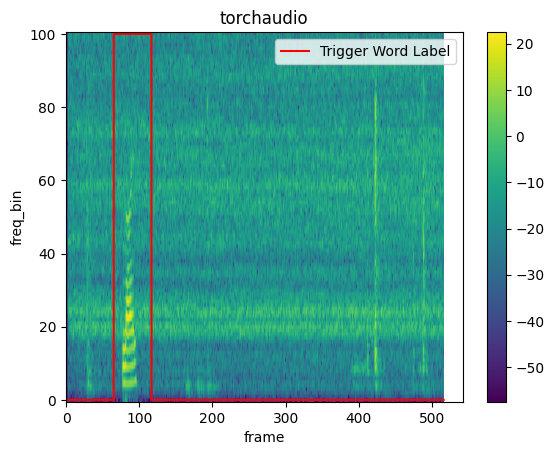

In [294]:
#load data
waveform, sample_rate = torchaudio.load('data/test/data_positive_7.wav')
label = torch.load('data/test/label_positive_7.pt')


spec_waveform = create_spectrogram(waveform)

    
plot_spectrogram(spec_waveform[0], label, title='torchaudio')

Audio(waveform.numpy()[0], rate=resample_rate)

In [289]:
import torchaudio.transforms as T
import matplotlib.pyplot as plt
import librosa


number_frequencies = 101
number_time_steps = 511*0.99 #this is ~ equal to the number of time steps as expressed by the second dimension of the spectrogram output
n_fft = number_frequencies*2  -1 # to ensure we have 101 frequencies 
win_length = None
hop_length =int( waveform.shape[1]/number_time_steps) # ensures we have 5556 time steps - as close to 5511 as I could get

# define transformation
spectrogram = T.Spectrogram(
    n_fft=n_fft,
    win_length=win_length,
    hop_length=hop_length,
    center=True,
    pad_mode="reflect",
    power=2.0,
)
# Perform transformation
spec_waveform = spectrogram(waveform)


print(spec_waveform.shape)
print(waveform.shape)
print(label.shape)
print(spec_waveform.shape[1]*spec_waveform.shape[2])

torch.Size([1, 101, 511])
torch.Size([1, 50000])
torch.Size([1, 50000])
51611


In [238]:
label.shape[1]

50000

tensor([0.0000e+00, 1.0000e+00, 2.0000e+00,  ..., 4.9998e+04, 4.9999e+04,
        5.0000e+04])

In [182]:
spec_waveform.shape

torch.Size([1, 513, 98])

In [125]:
librosa.power_to_db(spec).shape

(1, 513, 98)

In [115]:
Audio(clip.numpy()[0], rate=resample_rate)

In [67]:
val.generate_filepaths(folder_negative_word)
val.generate_filepaths(folder_trigger_word)

['speech_commands_v0.02.tar/nine\\00b01445_nohash_0.wav',
 'speech_commands_v0.02.tar/nine\\012c8314_nohash_0.wav',
 'speech_commands_v0.02.tar/nine\\012c8314_nohash_1.wav',
 'speech_commands_v0.02.tar/nine\\012c8314_nohash_2.wav',
 'speech_commands_v0.02.tar/nine\\0132a06d_nohash_0.wav',
 'speech_commands_v0.02.tar/nine\\0132a06d_nohash_1.wav',
 'speech_commands_v0.02.tar/nine\\0132a06d_nohash_2.wav',
 'speech_commands_v0.02.tar/nine\\0137b3f4_nohash_0.wav',
 'speech_commands_v0.02.tar/nine\\0137b3f4_nohash_1.wav',
 'speech_commands_v0.02.tar/nine\\0137b3f4_nohash_2.wav']

In [20]:
from IPython.display import Audio
background = val.create_background()
Audio(background.numpy()[0], rate=resample_rate)

In [73]:
torchaudio.save('data/test.wav',background,resample_rate)

In [74]:
resample_rate

5000